### Importing data and libraries

In [167]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns 

# pd.set_option('display.max_columns', None)
# pd.set_option("display.max_rows", None)

# df = pd.read_csv("C:/Users/Elias/Documents/Koulu/Aida_projekti/archive/used_cars_data.csv", nrows=100000, low_memory=False, index_col='vin')

# df.head()

In [165]:
# Tarkastellaan datatyyppejä, NaN:ien määrää.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, ZACNJABB5KPJ92081 to LRBFXBSA3LD097990
Data columns (total 65 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   back_legroom             95046 non-null   object 
 1   bed                      607 non-null     object 
 2   bed_height               8123 non-null    object 
 3   bed_length               8123 non-null    object 
 4   body_type                99599 non-null   object 
 5   cabin                    1667 non-null    object 
 6   city                     100000 non-null  object 
 7   city_fuel_economy        83984 non-null   float64
 8   combine_fuel_economy     0 non-null       float64
 9   daysonmarket             100000 non-null  int64  
 10  dealer_zip               100000 non-null  int64  
 11  description              97457 non-null   object 
 12  engine_cylinders         97002 non-null   object 
 13  engine_displacement      94661 non-nu

In [166]:
df.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,83984.000000,0.0,100000.000000,100000.000000,94661.000000,83984.000000,94661.000000,0.0,100000.000000,1.000000e+05,100000.000000,96443.000000,54278.000000,1.000000e+05,100000.000000,99358.000000,100000.000000,0.0,100000.000000
mean,22.236700,NaN,77.682170,14346.712650,2802.220555,29.091696,245.387414,NaN,41.418281,2.752572e+08,-74.962234,31130.643437,1.454346,3.049952e+04,711.255090,4.115767,242369.599200,NaN,2017.549320
std,7.807983,NaN,109.629986,15502.216726,1159.202851,7.058758,86.521390,NaN,1.106694,8.943492e+06,3.935869,42835.631267,0.815929,2.091578e+04,1320.821225,0.575305,130572.657133,NaN,3.804504
min,8.000000,NaN,0.000000,922.000000,700.000000,11.000000,70.000000,NaN,18.346700,9.873062e+07,-122.320000,0.000000,1.000000,7.950000e+02,0.000000,1.000000,41593.000000,NaN,1930.000000
25%,18.000000,NaN,14.000000,6704.000000,2000.000000,25.000000,176.000000,NaN,40.755800,2.744280e+08,-74.331500,7.000000,1.000000,1.799500e+04,0.000000,3.727273,65696.000000,NaN,2017.000000
50%,21.000000,NaN,36.000000,7960.000000,2500.000000,28.000000,241.000000,NaN,41.126400,2.783952e+08,-73.830500,15236.000000,1.000000,2.699500e+04,22.000000,4.222222,282435.000000,NaN,2019.000000
75%,25.000000,NaN,82.000000,11743.000000,3500.000000,32.000000,295.000000,NaN,42.300500,2.803310e+08,-73.021800,43304.000000,2.000000,3.872100e+04,1030.000000,4.550000,342815.000000,NaN,2020.000000
max,127.000000,NaN,2150.000000,98108.000000,8400.000000,127.000000,808.000000,NaN,47.549200,2.816772e+08,-66.078500,785778.000000,15.000000,1.390000e+06,95484.000000,5.000000,440485.000000,NaN,2021.000000


#### Koko 3 miljoonan rivin data menee tällä läpi

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


chunksize = 20000
chunks = pd.read_csv("C:/Users/Elias/Documents/Koulu/Aida_projekti/archive/used_cars_data.csv", chunksize=chunksize, low_memory=False, index_col='vin')

df_list = []

for chunk in chunks:
    df_list.append(chunk)

df = pd.concat(df_list, axis=0)

### Cleaning the data

df.infon perusteella voidaan jo pudottaa tiettyjä sarakkeita, esimerkiksi niitä, joissa on suuri määrä null-arvoja.

In [5]:
df = df.drop(['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy',
              'is_certified', 'is_cpo', 'is_oemcpo', 'vehicle_damage_category', 'owner_count'], axis=1)

# Tarkastetaan montako duplikaattia
print(df.duplicated().sum())

40


In [6]:
# Luodaan dataframesta kopio
car_df = df.copy()

### Back legroom

In [7]:
# Tarkistellaan back_legroom-saraketta. Value countsilla ja uniquella nähdään, montako tiettyä arvoa on, 
# monta uniikkia arvoa on, sekä, missä muodossa data on.
print(car_df['back_legroom'].info())
print(car_df['back_legroom'].value_counts())
print(car_df['back_legroom'].unique())

<class 'pandas.core.series.Series'>
Index: 3000040 entries, ZACNJABB5KPJ92081 to JN8AT2MT1HW400805
Series name: back_legroom
Non-Null Count    Dtype 
--------------    ----- 
2840771 non-null  object
dtypes: object(1)
memory usage: 45.8+ MB
None
38.3 in    113891
43.6 in    102491
37.4 in     87363
--          83458
35.7 in     77162
            ...  
47.1 in         1
27.9 in         1
23.5 in         1
25.7 in         1
52.8 in         1
Name: back_legroom, Length: 219, dtype: int64
['35.1 in' '38.1 in' '35.4 in' '37.6 in' '37.1 in' '33.8 in' '--' '35 in'
 '39.6 in' '35.7 in' '27.3 in' '38.4 in' '36.8 in' '38.6 in' '39.4 in' nan
 '34.1 in' '39.5 in' '36.2 in' '39.9 in' '37 in' '37.2 in' '38.3 in'
 '27.1 in' '40.1 in' '34.6 in' '35.3 in' '37.4 in' '38 in' '39.7 in'
 '35.6 in' '42.6 in' '33.7 in' '39 in' '38.2 in' '33 in' '37.9 in'
 '29.9 in' '37.8 in' '36.1 in' '34.2 in' '37.3 in' '40.3 in' '35.8 in'
 '39.3 in' '38.7 in' '39.1 in' '43.6 in' '41.7 in' '36.3 in' '45.2 in'
 '30.6 in' '43

In [8]:
# Otetaan vain lukuarvo talteen, korvataat arvot "--", muutetaan floateiksi ja täytetään tyhjät arvot
# keskiarvolla.
car_df['back_legroom'] = car_df['back_legroom'].str.split(' ').str[0]
car_df['back_legroom'].replace('--', np.nan, inplace=True)
car_df['back_legroom'] = pd.to_numeric(car_df['back_legroom'], downcast='float')
car_df['back_legroom'].fillna(car_df['back_legroom'].mean(), inplace=True)

### Body type

In [9]:
# Tutkitaan body_typeä, montako NaN-arvoa on.
print(car_df['body_type'].value_counts())
print(f"NaN: {car_df['body_type'].isna().sum()}")


SUV / Crossover    1416402
Sedan               742036
Pickup Truck        474595
Hatchback            88374
Minivan              79802
Coupe                71607
Van                  47166
Wagon                40505
Convertible          26010
Name: body_type, dtype: int64
NaN: 13543


In [10]:
# Katsotaan tarkemmin, missä automalleissa on NaN-arvo.
car_df.loc[:,['body_type', 'make_name', 'model_name']][car_df['body_type'].isna()].head()

,body_type,make_name,model_name
vin,,,
5XXG14J28MG001288,NaN,Kia,K5
5XXG14J2XMG006458,NaN,Kia,K5
5XXG14J28MG006443,NaN,Kia,K5
5XXG14J22MG003974,NaN,Kia,K5
5XXG64J29MG017274,NaN,Kia,K5


In [11]:
# Täyteään NaN-arvot 'SUV/Crossover', sillä se esiintyy useiten sarakkeessa. Tarkastetaan vielä, että 
# varmasti kaikki tyhjät arvot on täytetty.
car_df['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)
body_na = car_df['body_type'].isna().sum()

body_na

0

### City fuel economy

In [12]:
print(f"NaN: {car_df['city_fuel_economy'].isna().sum()}")
print(car_df['city_fuel_economy'].value_counts().sort_values())

NaN: 491285
7.0           2
112.0         3
93.0          3
98.0          5
83.0          6
          ...  
20.0     169255
21.0     170910
22.0     174756
18.0     191823
19.0     198958
Name: city_fuel_economy, Length: 100, dtype: int64


In [13]:
# Tarkastellaan poikkeamia
car_df.loc[:,['make_name','model_name','city_fuel_economy','engine_type','fuel_type']][car_df['city_fuel_economy'] > 60].head(5)

,make_name,model_name,city_fuel_economy,engine_type,fuel_type
vin,,,,,
WBAJB1C52KB375534,BMW,5 Series,66.0,I4,Gasoline
KMHC75LH4HU008626,Hyundai,Ioniq Electric,127.0,NaN,Electric
WBAJA9C56JB252397,BMW,5 Series,70.0,I4,Gasoline
KM8K53AG7LU067341,Hyundai,Kona Electric,127.0,NaN,Electric
KM8K53AGXLU065888,Hyundai,Kona Electric,127.0,NaN,Electric


In [14]:
# Täytetään NaN-arvot keskiarvolla ja tarkastetaan, että tyhjiä ei ole jäljellä.
car_df['city_fuel_economy'].replace(np.nan, car_df['city_fuel_economy'].mean(), inplace=True)
car_df['city_fuel_economy'].isna().sum()

0

### Highway fuel economy

In [15]:
print(f"NaN: {car_df['highway_fuel_economy'].isna().sum()}")
print(car_df['highway_fuel_economy'].value_counts().sort_values())

NaN: 491285
120.0         1
56.0          1
83.0          2
91.0          3
77.0          5
          ...  
22.0     148459
30.0     157121
28.0     160344
27.0     163239
25.0     163572
Name: highway_fuel_economy, Length: 99, dtype: int64


In [16]:
# Täytetään NaN-arvot keskiarvolla ja tarkastetaan, että tyhjiä ei ole jäljellä.
car_df['highway_fuel_economy'].fillna(car_df['highway_fuel_economy'].mean(), inplace=True)
car_df['highway_fuel_economy'].isna().sum()

0

In [17]:
# Luodaan uusi sarake, jossa yhdistetään polttoaineen kulutukset.
car_df['combined_fuel_economy'] = (car_df['city_fuel_economy'] + car_df['highway_fuel_economy']) / 2
car_df.drop(['city_fuel_economy', 'highway_fuel_economy'], axis=1, inplace=True)

car_df.head()

,back_legroom,body_type,city,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,...,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.099998,SUV / Crossover,Bayamon,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,26.08331
SALCJ2FX1LH858117,38.099998,SUV / Crossover,San Juan,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,...,A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.08331
JF1VA2M67G9829723,35.400002,Sedan,Guaynabo,1233,969,NaN,H4,2500.0,H4,None,...,M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,20.00000
SALRR2RV0L2433391,37.599998,SUV / Crossover,San Juan,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020,26.08331
SALCJ2FXXLH862327,38.099998,SUV / Crossover,San Juan,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,...,A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.08331


### Description

In [18]:
car_df['description']

vin
ZACNJABB5KPJ92081    [!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...
SALCJ2FX1LH858117    [!@@Additional Info@@!]Keyless Entry,Ebony Mor...
JF1VA2M67G9829723                                                  NaN
SALRR2RV0L2433391    [!@@Additional Info@@!]Fog Lights,7 Seat Packa...
SALCJ2FXXLH862327    [!@@Additional Info@@!]Keyless Entry,Ebony Mor...
                                           ...                        
2GNAXJEV0J6261526    CarMax Curbside is now available at select sto...
1GNERFKW0LJ225508    Prices do not include government fees and taxe...
3FA6P0HD3GR134062    Introducing the 2016 Ford Fusion! Offering an ...
SAJAJ4BNXHA968809    CarMax Curbside is now available at select sto...
JN8AT2MT1HW400805    Here it is!! In these economic times, a super ...
Name: description, Length: 3000040, dtype: object

In [19]:
# Pudotetaan sarake, sisältää paljon ei niin tärkeää tietoa, tai tietoa, joka on löydettävissä
# muista sarakkeista.
car_df.drop('description', axis=1, inplace=True)

### Engine cylinders

In [20]:
car_df['engine_cylinders'].head()

vin
ZACNJABB5KPJ92081    I4
SALCJ2FX1LH858117    I4
JF1VA2M67G9829723    H4
SALRR2RV0L2433391    V6
SALCJ2FXXLH862327    I4
Name: engine_cylinders, dtype: object

In [21]:
car_df['engine_type'].head()

vin
ZACNJABB5KPJ92081    I4
SALCJ2FX1LH858117    I4
JF1VA2M67G9829723    H4
SALRR2RV0L2433391    V6
SALCJ2FXXLH862327    I4
Name: engine_type, dtype: object

In [22]:
# Pudotetaan sarake, sillä tiedot on löydettävissä toisesta sarakkeesta.
car_df.drop('engine_cylinders', axis=1, inplace=True)

### Enginge displacement

In [23]:
car_df['engine_displacement']

vin
ZACNJABB5KPJ92081    1300.0
SALCJ2FX1LH858117    2000.0
JF1VA2M67G9829723    2500.0
SALRR2RV0L2433391    3000.0
SALCJ2FXXLH862327    2000.0
                      ...  
2GNAXJEV0J6261526    1500.0
1GNERFKW0LJ225508    3600.0
3FA6P0HD3GR134062    2000.0
SAJAJ4BNXHA968809    2000.0
JN8AT2MT1HW400805    2500.0
Name: engine_displacement, Length: 3000040, dtype: float64

In [24]:
print(car_df['engine_displacement'].isna().sum())
print(car_df['engine_displacement'].describe())

172386
count    2.827654e+06
mean     2.968488e+03
std      1.348905e+03
min      7.000000e+02
25%      2.000000e+03
50%      2.500000e+03
75%      3.600000e+03
max      8.400000e+03
Name: engine_displacement, dtype: float64


In [25]:
# Täytetään NaN-arvot keskiarvolla
car_df['engine_displacement'].fillna(car_df['engine_displacement'].mean(), inplace=True)

### Exterior color

In [26]:
car_df['exterior_color']

vin
ZACNJABB5KPJ92081             Solar Yellow
SALCJ2FX1LH858117             Narvik Black
JF1VA2M67G9829723                     None
SALRR2RV0L2433391               Eiger Gray
SALCJ2FXXLH862327             Narvik Black
                             ...          
2GNAXJEV0J6261526                   Silver
1GNERFKW0LJ225508    Mosaic Black Metallic
3FA6P0HD3GR134062                     Gray
SAJAJ4BNXHA968809                    Green
JN8AT2MT1HW400805         Brilliant Silver
Name: exterior_color, Length: 3000040, dtype: object

In [27]:
car_df['exterior_color'].isna().sum()

26

In [28]:
car_df['exterior_color'].value_counts()

Black                                  162463
White                                  126560
Summit White                            96432
Silver                                  78908
Gray                                    77562
                                        ...  
Blue Dusk Clearcoat Metallic                1
Dark Performancesian Green Metallic         1
BRILLANT                                    1
WHITE MET                                   1
Cosmic                                      1
Name: exterior_color, Length: 28665, dtype: int64

In [29]:
# Täytetään NaN-arvot mustalla, sillä se esiintyy useiten.
car_df['exterior_color'].fillna("Black", inplace=True)

In [30]:
# Uniikkeja värejä on todella paljon. Huomataan, että datassa esiintyy esimerkikssi
# musta väri monella eri nimellä. Yhdistetään värit 13 ryhmään.
colors = ['White', 'Black', 'Gray', 'Silver',
          'Red', 'Blue', 'Brown', 'Green', 'Beige',
          'Orange', 'Gold', 'Yellow', 'Purple']

car_df['exterior_color'] = car_df['exterior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [31]:
car_df['exterior_color'].unique()

array(['Yellow', 'Black', '', 'Gray', 'White', 'Red', 'Silver', 'Blue',
       'Orange', 'Brown', 'Blue, White', 'Green', 'Orange, Black', 'Gold',
       'Beige', 'Black, White', 'Purple', 'Gold, White', 'Black, Green',
       'Gray, Black', 'White, Silver', 'Gray, White', 'Black, Silver',
       'Red, Black', 'Gray, Green', 'Blue, Silver', 'Red, Silver',
       'Blue, Gray', 'Orange, Gray', 'Gold, Black', 'Blue, Black',
       'Gray, Silver', 'Red, Gray', 'Yellow, Gold', 'Brown, Black',
       'Yellow, Gray', 'Yellow, Black', 'White, Green', 'Black, Purple',
       'Red, White', 'Orange, White', 'Brown, Gray', 'Blue, Gold',
       'Silver, Green', 'Blue, Beige', 'Red, Orange', 'Brown, Silver',
       'Brown, White', 'Black, Beige', 'Silver, Beige', 'White, Beige',
       'Gold, Beige', 'Blue, Green', 'Blue, Purple', 'Red, Beige',
       'Gold, Gray', 'Red, Gold', 'Brown, Beige', 'Gold, Silver',
       'Black, White, Silver', 'Blue, Brown', 'Orange, Silver',
       'Red, Gold, White', 

In [32]:
car_df.loc[car_df['exterior_color'].str.contains(','), 'exterior_color'] = 'Mixed Color'


In [33]:
car_df['exterior_color'].value_counts()

               738325
White          633508
Black          538927
Silver         343230
Blue           233988
Red            223340
Gray           216821
Green           20495
Mixed Color     11263
Brown           11052
Orange          10536
Gold             8691
Beige            4479
Yellow           4424
Purple            961
Name: exterior_color, dtype: int64

In [34]:
car_df['exterior_color'].replace("", "Other Color", inplace=True)
car_df['exterior_color'].value_counts()

Other Color    738325
White          633508
Black          538927
Silver         343230
Blue           233988
Red            223340
Gray           216821
Green           20495
Mixed Color     11263
Brown           11052
Orange          10536
Gold             8691
Beige            4479
Yellow           4424
Purple            961
Name: exterior_color, dtype: int64

### Fleet

In [35]:
car_df['fleet']

vin
ZACNJABB5KPJ92081      NaN
SALCJ2FX1LH858117      NaN
JF1VA2M67G9829723    False
SALRR2RV0L2433391      NaN
SALCJ2FXXLH862327      NaN
                     ...  
2GNAXJEV0J6261526     True
1GNERFKW0LJ225508      NaN
3FA6P0HD3GR134062    False
SAJAJ4BNXHA968809    False
JN8AT2MT1HW400805    False
Name: fleet, Length: 3000040, dtype: object

In [36]:
print(car_df['fleet'].isna().sum())
print(car_df['fleet'].describe())

1426595
count     1573445
unique          2
top         False
freq      1238507
Name: fleet, dtype: object


In [37]:
percentage = car_df.isna().sum()/car_df.shape[0]*100
nulls = percentage[percentage > 0]

pd.DataFrame(nulls)

,0
engine_type,3.352655
fleet,47.552533
frame_damaged,47.552533
franchise_make,19.087579
front_legroom,5.308896
fuel_tank_volume,5.308896
fuel_type,2.757430
has_accidents,47.552533
height,5.308896
horsepower,5.746123


In [38]:
 car_df = car_df.drop(['frame_damaged', 'has_accidents', 'isCab', 'salvage', 'theft_title'], axis=1)

In [39]:
car_df['fleet'].fillna('False', inplace=True)
car_df['fleet'] = car_df['fleet'].replace({'False': False}).astype(bool)
car_df['fleet'].isna().sum()

0

### Franchise make

In [40]:
# Tarkastellaan franchise_makea
car_df['franchise_make']

vin
ZACNJABB5KPJ92081          Jeep
SALCJ2FX1LH858117    Land Rover
JF1VA2M67G9829723          FIAT
SALRR2RV0L2433391    Land Rover
SALCJ2FXXLH862327    Land Rover
                        ...    
2GNAXJEV0J6261526           NaN
1GNERFKW0LJ225508     Chevrolet
3FA6P0HD3GR134062          Jeep
SAJAJ4BNXHA968809           NaN
JN8AT2MT1HW400805        Nissan
Name: franchise_make, Length: 3000040, dtype: object

In [41]:
print(car_df['franchise_make'].describe())
print(car_df['franchise_make'].unique())

count     2427405
unique         48
top          Ford
freq       395521
Name: franchise_make, dtype: object
['Jeep' 'Land Rover' 'FIAT' 'Chevrolet' 'Cadillac' 'Chrysler' 'Dodge'
 'RAM' nan 'Kia' 'Mazda' 'Audi' 'Hyundai' 'Ford' 'Toyota' 'Lincoln'
 'Volvo' 'GMC' 'Volkswagen' 'BMW' 'Lexus' 'Buick' 'Subaru' 'Scion' 'Honda'
 'Nissan' 'Acura' 'INFINITI' 'Porsche' 'Rolls-Royce' 'Bentley'
 'Lamborghini' 'Mercedes-Benz' 'Jaguar' 'Maserati' 'Alfa Romeo' 'Ferrari'
 'MINI' 'Mitsubishi' 'Aston Martin' 'Lotus' 'McLaren' 'Pagani' 'Genesis'
 'SRT' 'smart' 'Rover' 'Shelby' 'Freightliner']


In [42]:
# Tarkastetaan NaN-arvoje määrä
print(car_df['franchise_make'].isna().sum())
print(car_df['make_name'].isna().sum())

572635
0


In [43]:
# Koska make_name ja franchise_make kertovat samaa tietoa, ja franchise-makessa on suuri määrä NaN-arvoja,
# pudotetaan sarake
car_df = car_df.drop(['franchise_make'], axis=1)

### Front legroom

In [44]:
# Tarkastellaan front_legroomia
car_df['front_legroom']

vin
ZACNJABB5KPJ92081    41.2 in
SALCJ2FX1LH858117    39.1 in
JF1VA2M67G9829723    43.3 in
SALRR2RV0L2433391      39 in
SALCJ2FXXLH862327    39.1 in
                      ...   
2GNAXJEV0J6261526    40.9 in
1GNERFKW0LJ225508      41 in
3FA6P0HD3GR134062    44.3 in
SAJAJ4BNXHA968809    41.5 in
JN8AT2MT1HW400805      43 in
Name: front_legroom, Length: 3000040, dtype: object

In [45]:
print(car_df['front_legroom'].describe())
print(car_df['front_legroom'].unique())

count     2840771
unique        101
top       40.9 in
freq       229552
Name: front_legroom, dtype: object
['41.2 in' '39.1 in' '43.3 in' '39 in' '40.2 in' '42.3 in' '40 in'
 '42.7 in' '42 in' '41.7 in' '41 in' '42.2 in' '45.4 in' '41.3 in'
 '40.3 in' '40.6 in' nan '42.6 in' '40.4 in' '42.4 in' '39.5 in' '40.9 in'
 '41.8 in' '45.3 in' '42.5 in' '44.1 in' '--' '45.5 in' '42.9 in'
 '43.9 in' '41.5 in' '41.1 in' '43 in' '40.8 in' '45 in' '40.1 in'
 '44.5 in' '38.9 in' '45.8 in' '67 in' '41.4 in' '40.7 in' '40.5 in'
 '42.8 in' '44.8 in' '43.6 in' '41.9 in' '43.7 in' '43.8 in' '42.1 in'
 '52.5 in' '43.1 in' '39.9 in' '41.6 in' '45.7 in' '43.5 in' '44.4 in'
 '44.3 in' '43.2 in' '38.8 in' '46.1 in' '39.8 in' '44.6 in' '44.2 in'
 '45.1 in' '37.7 in' '46.4 in' '35.8 in' '39.6 in' '46.9 in' '39.4 in'
 '44.7 in' '46.3 in' '43.4 in' '38.7 in' '39.3 in' '44 in' '36.6 in'
 '38 in' '39.2 in' '53.6 in' '38.6 in' '46 in' '46.5 in' '0 in' '45.9 in'
 '33.5 in' '38.5 in' '37.8 in' '38.1 in' '33 in' '29 in

In [46]:
# NaN-arvojen määrä
car_df['front_legroom'].isna().sum()

159269

In [47]:
# Otetaan vain lukuarvo talteen, täytetään tyhjät arvot, muutetaan floateiksi.
car_df['front_legroom'] = car_df['front_legroom'].str.split(' ').str[0]
car_df['front_legroom'].replace('--', np.nan, inplace=True)
car_df['front_legroom'] = pd.to_numeric(car_df['front_legroom'], downcast='float')

In [48]:
car_df['front_legroom'].describe()

count    2.824583e+06
mean     4.164296e+01
std      1.610130e+00
min      0.000000e+00
25%      4.100000e+01
50%      4.200000e+01
75%      4.300000e+01
max      6.700000e+01
Name: front_legroom, dtype: float64

In [49]:
# Täytetään NaNit keskiarvolla.
car_df['front_legroom'].fillna(car_df['front_legroom'].mean(), inplace=True)
car_df['front_legroom'].isna().sum()

0

In [50]:
# Yhdistetään front_legroom ja back_legroom yhdeksi sarakkeeksi
car_df['legroom'] = car_df['front_legroom'] + car_df['back_legroom']
car_df = car_df.drop(['front_legroom', 'back_legroom'], axis=1)

In [51]:
car_df.head()

,body_type,city,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,fleet,franchise_dealer,fuel_tank_volume,...,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy,legroom
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,960,1300.0,I4,Yellow,False,True,12.7 gal,...,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,26.08331,76.300003
SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,922,2000.0,I4,Black,False,True,17.7 gal,...,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.08331,77.199997
JF1VA2M67G9829723,Sedan,Guaynabo,1233,969,2500.0,H4,Other Color,False,True,15.9 gal,...,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,20.00000,78.699997
SALRR2RV0L2433391,SUV / Crossover,San Juan,196,922,3000.0,V6,Gray,False,True,23.5 gal,...,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020,26.08331,76.599998
SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,922,2000.0,I4,Black,False,True,17.7 gal,...,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.08331,77.199997


### Fuel tank volume

In [52]:
car_df['fuel_tank_volume']


vin
ZACNJABB5KPJ92081    12.7 gal
SALCJ2FX1LH858117    17.7 gal
JF1VA2M67G9829723    15.9 gal
SALRR2RV0L2433391    23.5 gal
SALCJ2FXXLH862327    17.7 gal
                       ...   
2GNAXJEV0J6261526    14.9 gal
1GNERFKW0LJ225508    19.4 gal
3FA6P0HD3GR134062    16.5 gal
SAJAJ4BNXHA968809    14.8 gal
JN8AT2MT1HW400805    14.5 gal
Name: fuel_tank_volume, Length: 3000040, dtype: object

In [53]:
print(f" NaN: {car_df['fuel_tank_volume'].isna().sum()}")
print(car_df['fuel_tank_volume'].describe())
print(car_df['fuel_tank_volume'].unique())

 NaN: 159269
count     2840771
unique        182
top        26 gal
freq       202824
Name: fuel_tank_volume, dtype: object
['12.7 gal' '17.7 gal' '15.9 gal' '23.5 gal' '16.6 gal' '13.2 gal'
 '10.5 gal' '15.8 gal' '22.5 gal' '14.8 gal' '14 gal' '17.4 gal'
 '19.4 gal' '22 gal' '24.6 gal' '13.5 gal' nan '16.9 gal' '18.8 gal'
 '27.6 gal' '21.5 gal' '15.6 gal' '18.5 gal' '26 gal' '12.4 gal'
 '19.2 gal' '18.6 gal' '14.9 gal' '23.2 gal' '24 gal' '16.4 gal'
 '13.7 gal' '19 gal' '14.5 gal' '31 gal' '24.1 gal' '18.1 gal' '18 gal'
 '21.7 gal' '23.8 gal' '15.3 gal' '34 gal' '21 gal' '19.5 gal' '16 gal'
 '28 gal' '26.4 gal' '27.7 gal' '36 gal' '35 gal' '20 gal' '21.6 gal'
 '15.1 gal' '21.1 gal' '12.8 gal' '11 gal' '22.2 gal' '16.1 gal'
 '17.2 gal' '19.8 gal' '20.5 gal' '17 gal' '9.3 gal' '25.1 gal' '25.4 gal'
 '25 gal' '13 gal' '11.1 gal' '21.9 gal' '23 gal' '11.9 gal' '14.2 gal'
 '14.3 gal' '16.5 gal' '11.4 gal' '17.8 gal' '17.1 gal' '--' '9.2 gal'
 '17.5 gal' '16.8 gal' '12.1 gal' '15.5 gal' '11.

In [54]:
# Suodatetaan rivit, joissa sarakkeen arvo on "Electric
car_df.loc[(car_df['fuel_type'] == "Electric"), ['fuel_tank_volume','fuel_type']].head()

,fuel_tank_volume,fuel_type
vin,,
KNDJP3AE3H7024713,NaN,Electric
KNDCC3LG4K5009935,NaN,Electric
1G1FZ6S05L4121127,NaN,Electric
1G1FZ6S06L4123999,NaN,Electric
KMHC75LH4HU008626,NaN,Electric


In [55]:
# Otetaan vain lukuarvo talteen, täytetään tyhjät arvot, muutetaan floateiksi.
car_df['fuel_tank_volume'] = car_df['fuel_tank_volume'].str.split(' ').str[0]
car_df['fuel_tank_volume'].replace("--", np.nan , inplace=True)
car_df['fuel_tank_volume'] = pd.to_numeric(car_df['fuel_tank_volume'], downcast='float')

In [56]:
# Nolla-arvojen täyttäminen arvolla 0 vain sähköautojen osalta.
car_df.loc[(car_df['fuel_type'] == "Electric"), 'fuel_tank_volume'] = 0
car_df[car_df['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']].head()

,fuel_tank_volume,fuel_type
vin,,
4S3GTAA67J3747545,NaN,NaN
WDDGF8BBXCR195380,NaN,Gasoline
3VW447AU9JM257055,NaN,Gasoline
1J4GR48K25C565853,NaN,NaN
1GTGG25VX51224016,NaN,Gasoline


In [57]:
car_df['fuel_tank_volume'].fillna(car_df.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)
car_df['fuel_tank_volume'].isna().sum()

50230

### Fuel type

In [58]:
print(f"NaN: {car_df['fuel_type'].isna().sum()}")

NaN: 82724


In [59]:
# Tarkastellaan rivejä, joissa NaN-arvot
car_df[car_df['fuel_type'].isna()][['fuel_type','fuel_tank_volume','engine_type','make_name','model_name']].head()

,fuel_type,fuel_tank_volume,engine_type,make_name,model_name
vin,,,,,
ZACCJBBB9HPF62165,NaN,12.7,NaN,Jeep,Renegade
4S3GTAA67J3747545,NaN,NaN,NaN,Subaru,Impreza
1C3CCBBG6DN528083,NaN,16.9,NaN,Chrysler,200
1C4RJFLTXKC690774,NaN,24.6,NaN,Jeep,Grand Cherokee
1C6SRFKT8KN500431,NaN,26.0,NaN,RAM,1500


In [60]:
# Koska mallit ovat bensiiniautoja, täytetään NaNit 'Gasoline'lla
car_df['fuel_type'].fillna('Gasoline', inplace=True)
car_df['fuel_type'].isna().sum()

0

In [61]:
# Tarkastetaan myäs 'fuel_tank_volumen' NaN-arvot
car_df['fuel_tank_volume'].fillna(car_df.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)
car_df['fuel_tank_volume'].isna().sum()

0

### Engine type

In [62]:
car_df['engine_type']

vin
ZACNJABB5KPJ92081           I4
SALCJ2FX1LH858117           I4
JF1VA2M67G9829723           H4
SALRR2RV0L2433391           V6
SALCJ2FXXLH862327           I4
                       ...    
2GNAXJEV0J6261526           I4
1GNERFKW0LJ225508           V6
3FA6P0HD3GR134062          NaN
SAJAJ4BNXHA968809    I4 Diesel
JN8AT2MT1HW400805           I4
Name: engine_type, Length: 3000040, dtype: object

In [63]:
print(car_df['engine_type'].describe())
print(car_df['engine_type'].unique())

count     2899459
unique         39
top            I4
freq      1418291
Name: engine_type, dtype: object
['I4' 'H4' 'V6' 'I6' 'V6 Diesel' nan 'V8' 'V8 Biodiesel'
 'V8 Flex Fuel Vehicle' 'V6 Flex Fuel Vehicle' 'I4 Hybrid' 'V6 Hybrid'
 'I3' 'I5' 'I4 Flex Fuel Vehicle' 'I4 Diesel' 'I6 Diesel' 'V8 Diesel' 'R2'
 'W12' 'V10' 'V12' 'V6 Biodiesel' 'H6' 'I2' 'W12 Flex Fuel Vehicle'
 'I5 Biodiesel' 'V8 Hybrid' 'H4 Hybrid' 'V8 Compressed Natural Gas'
 'I6 Hybrid' 'I5 Diesel' 'W8' 'I4 Compressed Natural Gas' 'V10 Diesel'
 'W16' 'V8 Propane' 'I3 Hybrid' 'V6 Compressed Natural Gas' 'V12 Hybrid']


In [64]:
print(f"NaN: {car_df['engine_type'].isna().sum()}")

NaN: 100581


In [65]:
# Poistetaan turha tietoa moottorimallin perästä.
car_df['engine_type'] = car_df['engine_type'].str.split(' ').str[0]
car_df['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', nan, 'V8', 'I3', 'I5', 'R2', 'W12', 'V10',
       'V12', 'H6', 'I2', 'W8', 'W16'], dtype=object)

In [66]:
# Tarkastellaan, millä autoilla NaN-arvot
car_df.loc[car_df['engine_type'].isna(), ['make_name', 'model_name', 'engine_type', 'fuel_type']].head()

,make_name,model_name,engine_type,fuel_type
vin,,,,
ZACCJBBB9HPF62165,Jeep,Renegade,NaN,Gasoline
4S3GTAA67J3747545,Subaru,Impreza,NaN,Gasoline
1C3CCBBG6DN528083,Chrysler,200,NaN,Gasoline
1C4RJFLTXKC690774,Jeep,Grand Cherokee,NaN,Gasoline
1C6SRFKT8KN500431,RAM,1500,NaN,Gasoline


In [67]:
# Täytetään "Electric" "Electric Motor":lla ja "Gasoline" "Gasoline engine":lla
car_df.loc[(car_df['engine_type'].isna()) & (car_df['fuel_type'] == "Electric"), 'engine_type'] = "Electric Motor"
car_df.loc[(car_df['engine_type'].isna()) & (car_df['fuel_type'] == "Gasoline"), 'engine_type'] = "Gasoline engine"

In [68]:
print(f"NaN: {car_df['engine_type'].isna().sum()}")

NaN: 830


In [69]:
car_df.loc[car_df['engine_type'].isna(), ['make_name', 'model_name', 'engine_type', 'fuel_type']].head()

,make_name,model_name,engine_type,fuel_type
vin,,,,
1FDAW57R18EA08459,Ford,F-550 Super Duty Chassis,NaN,Diesel
1FDAF57R98EC86980,Ford,F-550 Super Duty Chassis,NaN,Diesel
3C7WRMDL2DG554902,RAM,5500 Chassis,NaN,Diesel
1FDUF5HT9KDA03658,Ford,F-550 Super Duty Chassis,NaN,Diesel
1FDUF5HT3KDA08497,Ford,F-550 Super Duty Chassis,NaN,Diesel


In [70]:
# Täytetään tyhjän arvot 'Dieselillä', sillä näiden rivien 'fuel_type' on diesel
car_df.loc[(car_df['engine_type'].isna()) & (car_df['fuel_type'] == "Diesel"), 'engine_type'] = "Diesel engine"
print(f"NaN: {car_df['engine_type'].isna().sum()}")

NaN: 0


### Height

In [71]:
car_df['height']

vin
ZACNJABB5KPJ92081    66.5 in
SALCJ2FX1LH858117      68 in
JF1VA2M67G9829723    58.1 in
SALRR2RV0L2433391      73 in
SALCJ2FXXLH862327      68 in
                      ...   
2GNAXJEV0J6261526    65.4 in
1GNERFKW0LJ225508    70.7 in
3FA6P0HD3GR134062    58.2 in
SAJAJ4BNXHA968809    55.7 in
JN8AT2MT1HW400805    68.1 in
Name: height, Length: 3000040, dtype: object

In [72]:
print(car_df['height'].describe())
print(f"NaN: {car_df['height'].isna().sum()}")

count     2840771
unique        472
top       66.1 in
freq        85164
Name: height, dtype: object
NaN: 159269


In [73]:
car_df['height'] = car_df['height'].str.split(' ').str[0]
car_df['height']

vin
ZACNJABB5KPJ92081    66.5
SALCJ2FX1LH858117      68
JF1VA2M67G9829723    58.1
SALRR2RV0L2433391      73
SALCJ2FXXLH862327      68
                     ... 
2GNAXJEV0J6261526    65.4
1GNERFKW0LJ225508    70.7
3FA6P0HD3GR134062    58.2
SAJAJ4BNXHA968809    55.7
JN8AT2MT1HW400805    68.1
Name: height, Length: 3000040, dtype: object

In [74]:
# Otetaan vain lukuarvo talteen, korvataat arvot "--", muutetaan floateiksi ja täytetään tyhjät arvot
# keskiarvolla.
car_df['height'].replace('--', np.nan, inplace=True)
car_df['height'] = pd.to_numeric(car_df['height'], downcast='float')
car_df['height'].fillna(car_df['height'].mean(), inplace=True)

In [75]:
car_df['height'].fillna(car_df['height'].mean(), inplace=True)

In [76]:
car_df['height'].isna().sum()

0

### Horsepower

In [77]:
car_df['horsepower']

vin
ZACNJABB5KPJ92081    177.0
SALCJ2FX1LH858117    246.0
JF1VA2M67G9829723    305.0
SALRR2RV0L2433391    340.0
SALCJ2FXXLH862327    246.0
                     ...  
2GNAXJEV0J6261526    170.0
1GNERFKW0LJ225508    310.0
3FA6P0HD3GR134062    240.0
SAJAJ4BNXHA968809    180.0
JN8AT2MT1HW400805    170.0
Name: horsepower, Length: 3000040, dtype: float64

In [78]:
print(f"NaN: {car_df['horsepower'].isna().sum()}")
print(car_df['horsepower'].describe())

NaN: 172386
count    2.827654e+06
mean     2.479957e+02
std      9.046639e+01
min      5.500000e+01
25%      1.750000e+02
50%      2.440000e+02
75%      3.000000e+02
max      1.001000e+03
Name: horsepower, dtype: float64


In [79]:
# Täytetään NaN-arvot yleisimmällä arvolla
car_df['horsepower'].fillna(car_df['horsepower'].mode()[0], inplace=True)
car_df['horsepower'].isna().sum()

0

### Interior color

In [80]:
car_df['interior_color']

vin
ZACNJABB5KPJ92081                       Black
SALCJ2FX1LH858117               Black (Ebony)
JF1VA2M67G9829723                        None
SALRR2RV0L2433391    Gray (Ebony/Ebony/Ebony)
SALCJ2FXXLH862327               Black (Ebony)
                               ...           
2GNAXJEV0J6261526                       Black
1GNERFKW0LJ225508                   Jet Black
3FA6P0HD3GR134062                        None
SAJAJ4BNXHA968809                       Cream
JN8AT2MT1HW400805                        None
Name: interior_color, Length: 3000040, dtype: object

In [81]:

print(f"NaN: {car_df['interior_color'].isna().sum()}")

print(car_df['interior_color'].unique())
print(car_df['interior_color'].describe())

NaN: 165
['Black' 'Black (Ebony)' 'None' ... 'White (Jet Blk/kalahari Cloth)'
 'Red (Jet Blk/kalahari Perf Leather)' 'White (Medium Pewter Custom)']
count     2999875
unique      45726
top         Black
freq       871393
Name: interior_color, dtype: object


In [82]:
car_df['interior_color'].fillna('Black', inplace=True)

In [83]:
# Tehdään samaan tyyliin kuin exterior_colorin kanssa. Jaetaan data pienempiin ryhmiin.
colors = ['White', 'Black', 'Gray', 'Silver', 
          'Red', 'Blue', 'Brown', 'Green', 
          'Beige', 'Orange', 'Gold', 'Yellow', 'Purple']

car_df['interior_color'] = car_df['interior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')
car_df['interior_color'].value_counts()

Black                 1572878
                       643434
Gray                   374044
White                   91440
Brown                   74539
                       ...   
Blue, Gray, Silver          1
Purple, Green               1
Gold, White                 1
Silver, Green               1
Orange, Brown               1
Name: interior_color, Length: 80, dtype: int64

In [84]:
car_df.loc[car_df['interior_color'].str.contains(','), 'interior_color'] = 'Mixed Color'
car_df['interior_color'].replace("", "Other Color", inplace=True)
car_df['interior_color'].value_counts()

Black          1572878
Other Color     643434
Gray            374044
Mixed Color     158338
White            91440
Brown            74539
Red              33757
Silver           24135
Blue             22788
Green             2056
Gold              1191
Orange            1117
Yellow             156
Purple             122
Beige               45
Name: interior_color, dtype: int64

### Lenght

In [85]:
car_df['length']

vin
ZACNJABB5KPJ92081    166.6 in
SALCJ2FX1LH858117      181 in
JF1VA2M67G9829723    180.9 in
SALRR2RV0L2433391    195.1 in
SALCJ2FXXLH862327      181 in
                       ...   
2GNAXJEV0J6261526    183.1 in
1GNERFKW0LJ225508    204.3 in
3FA6P0HD3GR134062    191.7 in
SAJAJ4BNXHA968809    183.9 in
JN8AT2MT1HW400805    184.5 in
Name: length, Length: 3000040, dtype: object

In [86]:
print(f"NaN: {car_df['length'].isna().sum()}")
print(car_df['length'].describe())

NaN: 159269
count      2840771
unique         836
top       231.9 in
freq         97716
Name: length, dtype: object


In [87]:
car_df['length'].unique()

array(['166.6 in', '181 in', '180.9 in', '195.1 in', '188.9 in',
       '183.5 in', '172.1 in', '157.5 in', '182.5 in', '168.3 in',
       '179.1 in', '179.9 in', '193.8 in', '184.8 in', '204.3 in',
       '203.7 in', '189.8 in', '175.1 in', nan, '166.9 in', '181.1 in',
       '192.3 in', '191.7 in', '187.8 in', '192.1 in', '173.4 in',
       '201.2 in', '188.4 in', '182.3 in', '183.1 in', '200.8 in',
       '230 in', '183.3 in', '192.5 in', '191.1 in', '198.3 in', '210 in',
       '189.9 in', '192.6 in', '203.9 in', '176.2 in', '174.7 in',
       '203.6 in', '224.4 in', '188.3 in', '167.6 in', '183.9 in',
       '175.3 in', '173 in', '184.9 in', '192.8 in', '182 in', '175.6 in',
       '189.2 in', '174.5 in', '196.9 in', '191.5 in', '197.6 in',
       '183.7 in', '250 in', '224.9 in', '198.5 in', '204 in', '198.4 in',
       '224 in', '199.4 in', '191.4 in', '187.4 in', '190.3 in',
       '232.9 in', '231.7 in', '197.5 in', '196.8 in', '201.3 in',
       '190.8 in', '186.3 in', '178.2

In [88]:
# Otetaan vain lukuarvo talteen, korvataat arvot "--", muutetaan floateiksi
car_df['length'] = car_df['length'].str.split(" ").str[0]
car_df['length'].replace("--", np.nan, inplace=True)
car_df['length'] = pd.to_numeric(car_df['length'], downcast='float')

In [89]:
car_df['length'].describe()

count    2.840314e+06
mean     1.936891e+02
std      2.022106e+01
min      1.061000e+02
25%      1.820000e+02
50%      1.899000e+02
75%      2.008000e+02
max      2.941000e+02
Name: length, dtype: float64

In [90]:
# Täytetään tyhjät arvot mediaanilla
car_df['length'].fillna(car_df['length'].median(), inplace=True)

In [91]:
car_df['length'].isna().sum()

0

### Main picture Url

In [92]:
car_df['main_picture_url'].head()

vin
ZACNJABB5KPJ92081    https://static.cargurus.com/images/forsale/202...
SALCJ2FX1LH858117    https://static.cargurus.com/images/forsale/202...
JF1VA2M67G9829723                                                  NaN
SALRR2RV0L2433391    https://static.cargurus.com/images/forsale/202...
SALCJ2FXXLH862327    https://static.cargurus.com/images/forsale/202...
Name: main_picture_url, dtype: object

In [93]:
car_df.drop('main_picture_url', axis=1, inplace=True)

### Major options

In [94]:
car_df['major_options']

vin
ZACNJABB5KPJ92081                              ['Quick Order Package']
SALCJ2FX1LH858117                          ['Adaptive Cruise Control']
JF1VA2M67G9829723    ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...
SALRR2RV0L2433391                                                  NaN
SALCJ2FXXLH862327                          ['Adaptive Cruise Control']
                                           ...                        
2GNAXJEV0J6261526    ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...
1GNERFKW0LJ225508    ['Alloy Wheels', 'Third Row Seating', 'Bluetoo...
3FA6P0HD3GR134062       ['Alloy Wheels', 'Bluetooth', 'Backup Camera']
SAJAJ4BNXHA968809    ['Sunroof/Moonroof', 'Navigation System', 'All...
JN8AT2MT1HW400805    ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...
Name: major_options, Length: 3000040, dtype: object

In [95]:
car_df['major_options'].isna().sum()

200048

In [96]:
car_df['major_options_count'] = car_df['major_options'].str.count(',') + 1

car_df['major_options_count'].value_counts()

4.0     340507
3.0     314023
5.0     307013
6.0     282666
7.0     249405
8.0     225960
2.0     224622
1.0     183391
9.0     183372
10.0    150294
11.0    115622
12.0     80844
13.0     51702
14.0     32477
15.0     18990
16.0     12781
17.0      8002
18.0      5175
19.0      3521
20.0      2501
21.0      1640
22.0      1273
23.0      1063
24.0       746
25.0       623
26.0       492
27.0       311
28.0       222
29.0       211
30.0       125
31.0        93
32.0        89
33.0        56
34.0        48
35.0        41
36.0        24
38.0        14
37.0        12
39.0         7
40.0         6
45.0         4
41.0         4
44.0         3
48.0         3
53.0         2
49.0         2
52.0         2
50.0         2
43.0         2
42.0         1
59.0         1
57.0         1
47.0         1
Name: major_options_count, dtype: int64

In [97]:
car_df['major_options_count'].fillna(car_df['major_options_count'].mean(), inplace=True)
car_df['major_options_count'].isna().sum()

0

### Maximum seating

In [98]:
car_df['maximum_seating']

vin
ZACNJABB5KPJ92081    5 seats
SALCJ2FX1LH858117    7 seats
JF1VA2M67G9829723    5 seats
SALRR2RV0L2433391    7 seats
SALCJ2FXXLH862327    7 seats
                      ...   
2GNAXJEV0J6261526    5 seats
1GNERFKW0LJ225508    8 seats
3FA6P0HD3GR134062    5 seats
SAJAJ4BNXHA968809    5 seats
JN8AT2MT1HW400805    7 seats
Name: maximum_seating, Length: 3000040, dtype: object

In [99]:
print(f"NaN: {car_df['maximum_seating'].isna().sum()}")
print(car_df['maximum_seating'].unique())
print(car_df['maximum_seating'].describe())


NaN: 159269
['5 seats' '7 seats' '2 seats' '4 seats' '8 seats' nan '6 seats' '9 seats'
 '3 seats' '--' '15 seats' '12 seats' '10 seats']
count     2840771
unique         12
top       5 seats
freq      1875357
Name: maximum_seating, dtype: object


In [100]:
# Poistetaan lukumäärän perästä "seats" ja korvataat arvot "--"
car_df['maximum_seating'] = car_df['maximum_seating'].str.replace(" seats", "")
car_df['maximum_seating'].replace("--", np.nan, inplace=True)

In [101]:
car_df['maximum_seating'].value_counts()

5     1875357
7      305330
6      301485
8      200360
4       81174
2       35105
3       29676
15       5906
9        3634
12       1703
10        540
Name: maximum_seating, dtype: int64

In [102]:
# 5 esiintyy useiten, joten täytetään tällä tyhjät arvot. Muutetaan arvot kokonaisluvuiksi.
car_df['maximum_seating'].fillna('5', inplace=True)
car_df['maximum_seating'] = pd.to_numeric(car_df['maximum_seating'], downcast='integer')
print(f"NaN: {car_df['maximum_seating'].isna().sum()}")

NaN: 0


### Mileage

In [103]:
car_df['mileage']

vin
ZACNJABB5KPJ92081        7.0
SALCJ2FX1LH858117        8.0
JF1VA2M67G9829723        NaN
SALRR2RV0L2433391       11.0
SALCJ2FXXLH862327        7.0
                      ...   
2GNAXJEV0J6261526    41897.0
1GNERFKW0LJ225508        5.0
3FA6P0HD3GR134062    57992.0
SAJAJ4BNXHA968809    27857.0
JN8AT2MT1HW400805    22600.0
Name: mileage, Length: 3000040, dtype: float64

In [104]:
print(f"NaN: {car_df['mileage'].isna().sum()}")
print(car_df['mileage'].describe())
print(car_df['mileage'].unique())

NaN: 144387
count    2.855653e+06
mean     3.114690e+04
std      7.458675e+04
min      0.000000e+00
25%      6.000000e+00
50%      8.267000e+03
75%      4.366200e+04
max      9.999999e+07
Name: mileage, dtype: float64
[7.00000e+00 8.00000e+00         nan ... 3.87347e+05 1.80525e+05
 1.21932e+05]


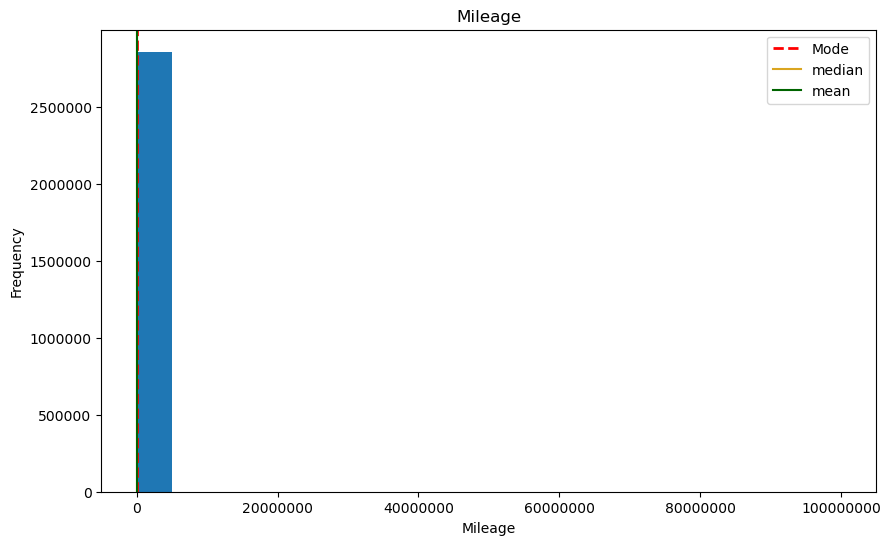

In [105]:
# Plotataan mittarilukemat
plt.figure(figsize=(10,6))
plt.hist(car_df['mileage'], bins=20)
plt.title('Mileage')

plt.axvline(car_df['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(car_df['mileage'].median(), color='goldenrod', label='median')
plt.axvline(car_df['mileage'].mean(), color='darkgreen', label='mean')

plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [106]:
# Poistetaan poikkeamat
q1 = car_df['mileage'].quantile(0.25)
q3 = car_df['mileage'].quantile(0.75)

iqr = q3 - q1

car_df = car_df[(car_df['mileage'] >= q1 - 1.5*iqr) &
               (car_df['mileage'] <= q3 + 1.5*iqr)]

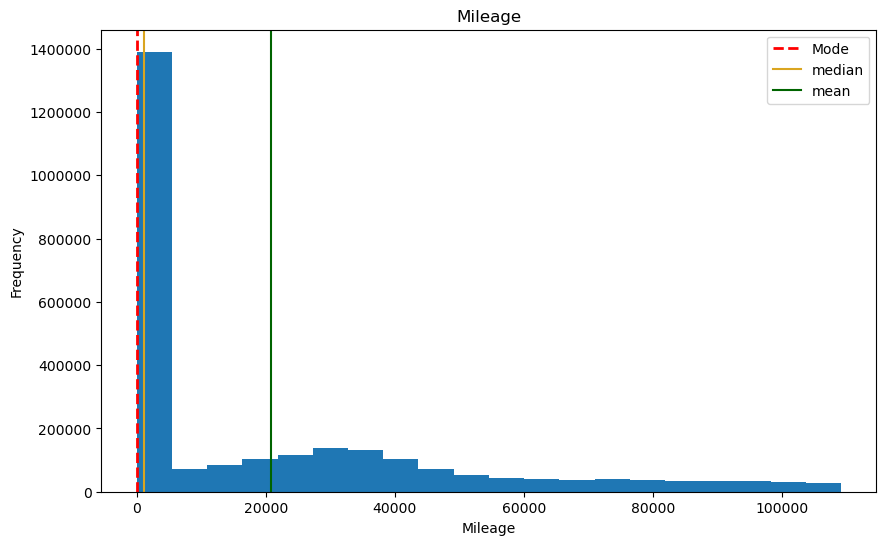

In [107]:
plt.figure(figsize=(10,6))
plt.hist(car_df['mileage'], bins=20)
plt.title('Mileage')

plt.axvline(car_df['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(car_df['mileage'].median(), color='goldenrod', label='median')
plt.axvline(car_df['mileage'].mean(), color='darkgreen', label='mean')

plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [108]:
# Täyteetään tyhjät arvot keskiarvolla
car_df['mileage'].fillna(car_df['mileage'].mean(), inplace=True)
car_df['mileage'].isna().sum()

0

### Power

In [109]:
car_df['power']

vin
ZACNJABB5KPJ92081    177 hp @ 5,750 RPM
SALCJ2FX1LH858117    246 hp @ 5,500 RPM
SALRR2RV0L2433391    340 hp @ 6,500 RPM
SALCJ2FXXLH862327    246 hp @ 5,500 RPM
SALYK2EX1LA261711    247 hp @ 5,500 RPM
                            ...        
2GNAXJEV0J6261526                   NaN
1GNERFKW0LJ225508    310 hp @ 6,800 RPM
3FA6P0HD3GR134062    240 hp @ 5,500 RPM
SAJAJ4BNXHA968809    180 hp @ 4,000 RPM
JN8AT2MT1HW400805    170 hp @ 6,000 RPM
Name: power, Length: 2625946, dtype: object

In [110]:
print(f"NaN: {car_df['power'].isna().sum()}")

NaN: 427758


In [111]:
car_df['power'] = car_df['power'].str.split(' ').str[0]

In [112]:
car_df['power'].unique()

array(['177', '246', '340', '247', '186', '296', '237', '320', '148',
       '254', '187', '201', '160', '311', '310', '180', '281', '295',
       '172', nan, '147', '360', '283', '182', '355', '285', '270', '208',
       '170', '300', '301', '158', '241', '707', '185', '365', '450',
       '175', '385', '420', '380', '164', '248', '287', '335', '138',
       '354', '395', '398', '153', '290', '271', '288', '286', '455',
       '550', '200', '250', '181', '284', '518', '292', '305', '575',
       '308', '435', '797', '268', '240', '205', '143', '555', '179',
       '184', '315', '302', '141', '400', '276', '362', '228', '189',
       '402', '188', '220', '252', '280', '211', '278', '323', '345',
       '563', '272', '210', '449', '382', '330', '197', '176', '140',
       '429', '577', '325', '390', '130', '155', '556', '260', '245',
       '370', '580', '123', '192', '230', '251', '150', '120', '367',
       '78', '350', '151', '403', '152', '132', '198', '173', '304',
       '196', '2

In [113]:
car_df['power'] = car_df['power'].str.replace(',', '.')
car_df['power'] = pd.to_numeric(car_df['power'], downcast='integer')

In [114]:
car_df['power']

vin
ZACNJABB5KPJ92081    177.0
SALCJ2FX1LH858117    246.0
SALRR2RV0L2433391    340.0
SALCJ2FXXLH862327    246.0
SALYK2EX1LA261711    247.0
                     ...  
2GNAXJEV0J6261526      NaN
1GNERFKW0LJ225508    310.0
3FA6P0HD3GR134062    240.0
SAJAJ4BNXHA968809    180.0
JN8AT2MT1HW400805    170.0
Name: power, Length: 2625946, dtype: float64

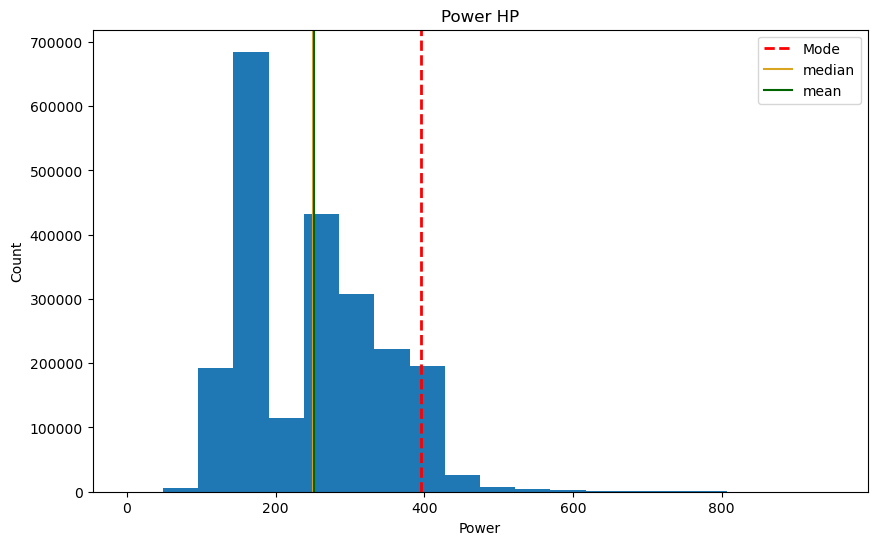

In [115]:
plt.figure(figsize=(10,6))
plt.hist(car_df['power'], bins=20)
plt.title('Power HP')

plt.axvline(car_df['power'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(car_df['power'].median(), color='goldenrod', label='median')
plt.axvline(car_df['power'].mean(), color='darkgreen', label='mean')

plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Power')
plt.ylabel('Count')
plt.show()

In [116]:
# Plotin perusteella täytetään tyhjät arvot mediaanilla.
car_df['power'].fillna(car_df['power'].median(), inplace=True)
car_df.rename(columns={'power' : 'power_hp'}, inplace=True)

In [117]:
car_df['power_hp'].isna().sum()

0

### Seller rating

In [118]:
car_df['seller_rating']

vin
ZACNJABB5KPJ92081    2.800000
SALCJ2FX1LH858117    3.000000
SALRR2RV0L2433391    3.000000
SALCJ2FXXLH862327    3.000000
SALYK2EX1LA261711    3.000000
                       ...   
2GNAXJEV0J6261526    4.272727
1GNERFKW0LJ225508    4.533333
3FA6P0HD3GR134062    4.142857
SAJAJ4BNXHA968809    4.272727
JN8AT2MT1HW400805    4.333333
Name: seller_rating, Length: 2625946, dtype: float64

In [119]:
print(f"NaN: {car_df['seller_rating'].isna().sum()}")
print(car_df['seller_rating'].describe())
print(f" Seller rating mode: {car_df['seller_rating'].mode()}")

NaN: 31152
count    2.594794e+06
mean     4.268910e+00
std      5.107202e-01
min      1.000000e+00
25%      4.000000e+00
50%      4.333333e+00
75%      4.600000e+00
max      5.000000e+00
Name: seller_rating, dtype: float64
 Seller rating mode: 0    5.0
Name: seller_rating, dtype: float64


In [120]:
# Täytetään tyhjät arvot useiten esiintyvät arvon mukaan
car_df['seller_rating'].fillna('5', inplace=True)

In [121]:
print(f"NaN: {car_df['seller_rating'].isna().sum()}")

NaN: 0


In [122]:
car_df['seller_rating'] = car_df['seller_rating'].astype(int)

### Sp id

In [123]:
car_df['sp_id']

vin
ZACNJABB5KPJ92081    370599.0
SALCJ2FX1LH858117    389227.0
SALRR2RV0L2433391    389227.0
SALCJ2FXXLH862327    389227.0
SALYK2EX1LA261711    389227.0
                       ...   
2GNAXJEV0J6261526    341247.0
1GNERFKW0LJ225508    310674.0
3FA6P0HD3GR134062    389479.0
SAJAJ4BNXHA968809    341247.0
JN8AT2MT1HW400805     64910.0
Name: sp_id, Length: 2625946, dtype: float64

In [124]:
car_df.drop(['sp_id'], axis=1, inplace=True)

### Torque

In [125]:
car_df['torque']

vin
ZACNJABB5KPJ92081    200 lb-ft @ 1,750 RPM
SALCJ2FX1LH858117    269 lb-ft @ 1,400 RPM
SALRR2RV0L2433391    332 lb-ft @ 3,500 RPM
SALCJ2FXXLH862327    269 lb-ft @ 1,400 RPM
SALYK2EX1LA261711    269 lb-ft @ 1,200 RPM
                             ...          
2GNAXJEV0J6261526                      NaN
1GNERFKW0LJ225508    266 lb-ft @ 2,800 RPM
3FA6P0HD3GR134062    270 lb-ft @ 1,750 RPM
SAJAJ4BNXHA968809    318 lb-ft @ 1,750 RPM
JN8AT2MT1HW400805    175 lb-ft @ 4,400 RPM
Name: torque, Length: 2625946, dtype: object

In [126]:
print(f"NaN: {car_df['torque'].isna().sum()}")
print(car_df['torque'].describe())

NaN: 460039
count                   2165907
unique                     1925
top       383 lb-ft @ 4,100 RPM
freq                      81277
Name: torque, dtype: object


In [127]:
# Otetaan vain ensimmäinen lukuarvo talteen, muutetaan floateiksi
car_df['torque'] = car_df['torque'].str.split(" ").str[0]
car_df['torque'] = car_df['torque'].astype(float)
car_df['torque']

vin
ZACNJABB5KPJ92081    200.0
SALCJ2FX1LH858117    269.0
SALRR2RV0L2433391    332.0
SALCJ2FXXLH862327    269.0
SALYK2EX1LA261711    269.0
                     ...  
2GNAXJEV0J6261526      NaN
1GNERFKW0LJ225508    266.0
3FA6P0HD3GR134062    270.0
SAJAJ4BNXHA968809    318.0
JN8AT2MT1HW400805    175.0
Name: torque, Length: 2625946, dtype: float64

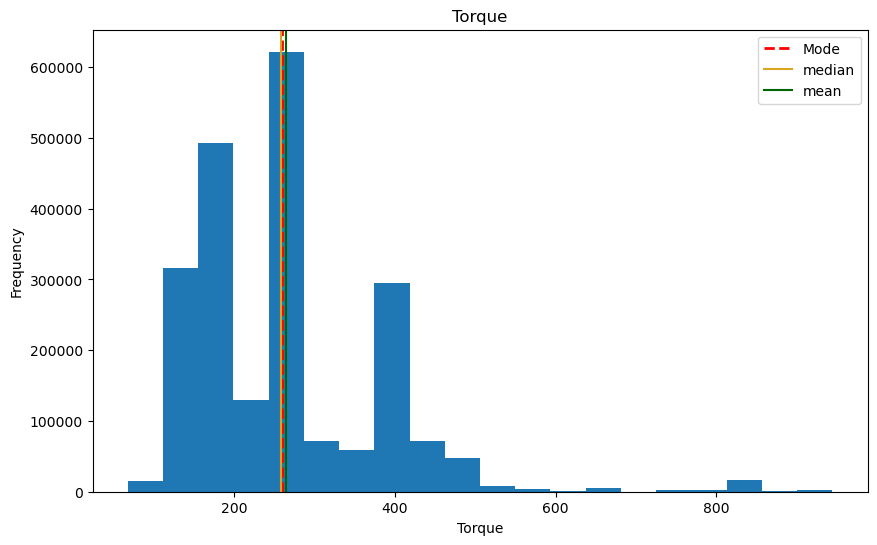

In [128]:
plt.figure(figsize=(10,6))
plt.hist(car_df['torque'], bins=20)
plt.title('Torque')

plt.axvline(car_df['torque'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(car_df['torque'].median(), color='goldenrod', label='median')
plt.axvline(car_df['torque'].mean(), color='darkgreen', label='mean')

plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

In [129]:
# Plotin perusteella voidaan paikata tyhjät arvot keskiarvolla
car_df['torque'].fillna(car_df['torque'].mean(), inplace=True)
car_df['torque'].isna().sum()

0

### Transmission

In [130]:
car_df['transmission']

vin
ZACNJABB5KPJ92081    A
SALCJ2FX1LH858117    A
SALRR2RV0L2433391    A
SALCJ2FXXLH862327    A
SALYK2EX1LA261711    A
                    ..
2GNAXJEV0J6261526    A
1GNERFKW0LJ225508    A
3FA6P0HD3GR134062    A
SAJAJ4BNXHA968809    A
JN8AT2MT1HW400805    A
Name: transmission, Length: 2625946, dtype: object

In [131]:
print(f"NaN: {car_df['transmission'].isna().sum()}")

print(car_df['transmission'].describe())
print(car_df['transmission'].unique())


NaN: 54933
count     2571013
unique          4
top             A
freq      2102484
Name: transmission, dtype: object
['A' 'CVT' 'M' nan 'Dual Clutch']


In [132]:
car_df['transmission'].fillna("A", inplace=True)

In [133]:
car_df['transmission'].isna().sum()

0

### Transmission display

In [134]:
car_df['transmission_display']

vin
ZACNJABB5KPJ92081    9-Speed Automatic Overdrive
SALCJ2FX1LH858117    9-Speed Automatic Overdrive
SALRR2RV0L2433391    8-Speed Automatic Overdrive
SALCJ2FXXLH862327    9-Speed Automatic Overdrive
SALYK2EX1LA261711    8-Speed Automatic Overdrive
                                ...             
2GNAXJEV0J6261526                      Automatic
1GNERFKW0LJ225508                      Automatic
3FA6P0HD3GR134062    6-Speed Automatic Overdrive
SAJAJ4BNXHA968809                      Automatic
JN8AT2MT1HW400805                      Automatic
Name: transmission_display, Length: 2625946, dtype: object

In [135]:
car_df.drop(['transmission_display'], axis=1, inplace=True)

### Trim id

In [136]:
car_df.drop(['trimId'], axis=1, inplace=True)

### Trim name

In [137]:
car_df.drop(['trim_name'], axis=1, inplace=True)

### Wheel system

In [138]:
car_df['wheel_system']

vin
ZACNJABB5KPJ92081    FWD
SALCJ2FX1LH858117    AWD
SALRR2RV0L2433391    AWD
SALCJ2FXXLH862327    AWD
SALYK2EX1LA261711    AWD
                    ... 
2GNAXJEV0J6261526    FWD
1GNERFKW0LJ225508    FWD
3FA6P0HD3GR134062    FWD
SAJAJ4BNXHA968809    AWD
JN8AT2MT1HW400805    FWD
Name: wheel_system, Length: 2625946, dtype: object

In [139]:
car_df['wheel_system'].isna().sum()

124322

In [140]:
car_df['wheel_system'].unique()

array(['FWD', 'AWD', 'RWD', '4WD', nan, '4X2'], dtype=object)

In [141]:
car_df['wheel_system'].describe()

count     2501624
unique          5
top           FWD
freq      1112034
Name: wheel_system, dtype: object

In [142]:
car_df['wheel_system'].value_counts()/car_df.shape[0]*100

FWD    42.347939
AWD    23.759590
4WD    19.034131
RWD     6.197843
4X2     3.926128
Name: wheel_system, dtype: float64

In [143]:
car_df['wheel_system'].fillna('FWD', inplace=True)

In [144]:
car_df['wheel_system'].isna().sum()

0

### Wheel system display

In [145]:
car_df.drop(['wheel_system_display'], axis=1, inplace=True)

### Wheelbase

In [146]:
car_df['wheelbase']

vin
ZACNJABB5KPJ92081    101.2 in
SALCJ2FX1LH858117    107.9 in
SALRR2RV0L2433391      115 in
SALCJ2FXXLH862327    107.9 in
SALYK2EX1LA261711    113.1 in
                       ...   
2GNAXJEV0J6261526    107.3 in
1GNERFKW0LJ225508    120.9 in
3FA6P0HD3GR134062    112.2 in
SAJAJ4BNXHA968809    111.6 in
JN8AT2MT1HW400805    106.5 in
Name: wheelbase, Length: 2625946, dtype: object

In [147]:
car_df['wheelbase'].isna().sum()

131063

In [148]:
car_df['wheelbase'] = car_df['wheelbase'].str.split(" ").str[0]
car_df['wheelbase'].replace("--", np.nan, inplace=True)
car_df['wheelbase'] = car_df['wheelbase'].astype(float)

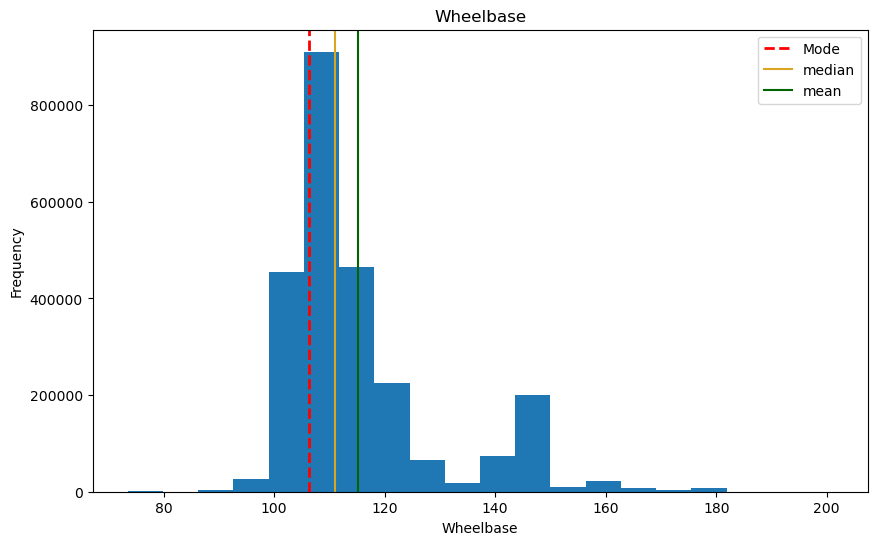

In [149]:
plt.figure(figsize=(10,6))
plt.hist(car_df['wheelbase'], bins=20)
plt.title('Wheelbase')

plt.axvline(car_df['wheelbase'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(car_df['wheelbase'].median(), color='goldenrod', label='median')

plt.axvline(car_df['wheelbase'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Wheelbase')
plt.ylabel('Frequency')
plt.show()

In [150]:
car_df['wheelbase'].fillna(car_df['wheelbase'].median(), inplace=True)
car_df['wheelbase'].isna().sum()

0

### Width

In [151]:
car_df['width']

vin
ZACNJABB5KPJ92081    79.6 in
SALCJ2FX1LH858117    85.6 in
SALRR2RV0L2433391    87.4 in
SALCJ2FXXLH862327    85.6 in
SALYK2EX1LA261711    84.4 in
                      ...   
2GNAXJEV0J6261526    72.6 in
1GNERFKW0LJ225508    78.6 in
3FA6P0HD3GR134062    83.5 in
SAJAJ4BNXHA968809    81.7 in
JN8AT2MT1HW400805    72.4 in
Name: width, Length: 2625946, dtype: object

In [152]:
car_df['width'].isna().sum()

131063

In [153]:
car_df['width'].describe()

count     2494883
unique        280
top       72.4 in
freq       122625
Name: width, dtype: object

In [154]:
car_df['width']

vin
ZACNJABB5KPJ92081    79.6 in
SALCJ2FX1LH858117    85.6 in
SALRR2RV0L2433391    87.4 in
SALCJ2FXXLH862327    85.6 in
SALYK2EX1LA261711    84.4 in
                      ...   
2GNAXJEV0J6261526    72.6 in
1GNERFKW0LJ225508    78.6 in
3FA6P0HD3GR134062    83.5 in
SAJAJ4BNXHA968809    81.7 in
JN8AT2MT1HW400805    72.4 in
Name: width, Length: 2625946, dtype: object

In [155]:
car_df['width'] = car_df['width'].str.split(" ").str[0]
car_df['width'].replace("--", np.nan, inplace=True)
car_df['width'] = pd.to_numeric(car_df['width'], downcast='float')

In [156]:
car_df['width']

vin
ZACNJABB5KPJ92081    79.599998
SALCJ2FX1LH858117    85.599998
SALRR2RV0L2433391    87.400002
SALCJ2FXXLH862327    85.599998
SALYK2EX1LA261711    84.400002
                       ...    
2GNAXJEV0J6261526    72.599998
1GNERFKW0LJ225508    78.599998
3FA6P0HD3GR134062    83.500000
SAJAJ4BNXHA968809    81.699997
JN8AT2MT1HW400805    72.400002
Name: width, Length: 2625946, dtype: float32

In [157]:
car_df['width'].describe()

count    2.494462e+06
mean     7.834861e+01
std      7.635361e+00
min      4.250000e+01
25%      7.240000e+01
50%      7.730000e+01
75%      8.330000e+01
max      1.090000e+02
Name: width, dtype: float64

In [158]:
car_df['width'].fillna(car_df['width'].mode()[0], inplace=True)

In [159]:
car_df['width'].isna().sum()

0

### Jäljellä olevat NaN

In [160]:
car_df.isna().sum()

body_type                     0
city                          0
daysonmarket                  0
dealer_zip                    0
engine_displacement           0
engine_type                   0
exterior_color                0
fleet                         0
franchise_dealer              0
fuel_tank_volume              0
fuel_type                     0
height                        0
horsepower                    0
interior_color                0
is_new                        0
latitude                      0
length                        0
listed_date                   0
listing_color                 0
listing_id                    0
longitude                     0
major_options            163365
make_name                     0
maximum_seating               0
mileage                       0
model_name                    0
power_hp                      0
price                         0
savings_amount                0
seller_rating                 0
sp_name                       0
torque  

In [161]:
car_df.select_dtypes(exclude=np.number).columns

Index(['body_type', 'city', 'dealer_zip', 'engine_type', 'exterior_color',
       'fleet', 'franchise_dealer', 'fuel_type', 'interior_color', 'is_new',
       'listed_date', 'listing_color', 'major_options', 'make_name',
       'model_name', 'sp_name', 'transmission', 'wheel_system'],
      dtype='object')

In [162]:
car_df.drop(['franchise_dealer'], axis=1, inplace=True)

In [163]:
car_df.head()

,body_type,city,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,fleet,fuel_tank_volume,fuel_type,...,sp_name,torque,transmission,wheel_system,wheelbase,width,year,combined_fuel_economy,legroom,major_options_count
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,960,1300.0,I4,Yellow,False,12.700000,Gasoline,...,Flagship Chrysler,200.0,A,FWD,101.2,79.599998,2019,26.08331,76.300003,1.000000
SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,922,2000.0,I4,Black,False,17.700001,Gasoline,...,Land Rover San Juan,269.0,A,AWD,107.9,85.599998,2020,26.08331,77.199997,1.000000
SALRR2RV0L2433391,SUV / Crossover,San Juan,196,922,3000.0,V6,Gray,False,23.500000,Gasoline,...,Land Rover San Juan,332.0,A,AWD,115.0,87.400002,2020,26.08331,76.599998,6.161012
SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,922,2000.0,I4,Black,False,17.700001,Gasoline,...,Land Rover San Juan,269.0,A,AWD,107.9,85.599998,2020,26.08331,77.199997,1.000000
SALYK2EX1LA261711,SUV / Crossover,San Juan,242,922,2000.0,I4,Other Color,False,16.600000,Gasoline,...,Land Rover San Juan,269.0,A,AWD,113.1,84.400002,2020,26.08331,77.300003,8.000000
